In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
cc_df = pd.read_csv('/aiffel/data/fraud.csv')

In [3]:
pd.set_option('display.max_columns',50)

In [4]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [5]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

# 컬럼 & 데이터 확인
- 거래 시간, 카드 번호, 구매한 상점, 카테고리, 금액, 카드 소유자 이름&주소&직업&생일, 거주지 인구, 상점의 위도&경도, 사기 거래 여부 등
- 결측치 없음!!

# 대충 확인해볼 법한 내용
- 결제 금액이 너무 큰거(amt)
- 결제 시간이 너무 새벽(trans_date,time)
- 짧은 시간에 너무 여러번 결제?
- 카드 소유자 주소와 구매한 상점 주소가 너무 먼거?(위도,경도)
- 평소 구매 패턴과 다른 카테고리 구매?
- 직업/성별과 상관없는 카테고리 구매?


In [6]:
cc_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


# 이상한 부분
- amt 최대치가 너무 큼
- long에 min이 -122찍힌게 조금 이상해보임

In [7]:
# 혹시 중복값 있는지 확인
cc_df[cc_df.duplicated()]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [8]:
# city_pop 컬럼은 딱히 필요 없을 것 같으니 삭제
cc_df.drop(columns=['city_pop'], inplace=True)

In [124]:
# merchant, zip도 필요 없어 보이니 삭제
cc_df.drop(['merchant', 'zip'], axis = 1, inplace=True)

In [125]:
# 제대로 삭제되었는지 확인
cc_df.head()

,trans_date_trans_time,cc_num,category,amt,first,last,gender,street,city,state,lat,long,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,avg_amt,trans_hour,trans_dow,weekend,prev_trans_time,trans_gap,trans_night,distance,fraud_amt_cluster,advanced_fraud_cluster,age,age_group,amt_z,cat_amt_z,dist_z
0,2019-01-01 04:34:51,503874407318,gas_transport,63.89,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,29.5894,-98.5201,Exhibition designer,1975-12-28,5ef7adf6786b41be780a08212b32495e,1325392491,28.740953,-99.391846,0,60.253406,4,1,False,NaT,NaN,True,78.685085,NaN,NaN,48,45+,0.028575,-0.310094,1.576429
1,2019-01-01 14:14:18,503874407318,entertainment,40.75,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,29.5894,-98.5201,Exhibition designer,1975-12-28,7d4f71c78267f01b54c92804a7aa1c80,1325427258,29.165407,-98.012932,0,60.253406,14,1,False,2019-01-01 04:34:51,9.657500,False,42.294043,NaN,NaN,48,45+,-0.153249,-0.315694,-0.392759
2,2019-01-01 20:49:42,503874407318,food_dining,105.78,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,29.5894,-98.5201,Exhibition designer,1975-12-28,dd25ad6eb8d19c91179b1aec1cd698f3,1325450982,30.468436,-98.663858,0,60.253406,20,1,False,2019-01-01 14:14:18,6.590000,False,61.158698,NaN,NaN,48,45+,0.357728,1.440815,0.628043
3,2019-01-01 21:23:54,503874407318,misc_pos,92.64,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,29.5894,-98.5201,Exhibition designer,1975-12-28,b3c21c15df76d9a71ed87fe75fe8d525,1325453034,29.361914,-98.911457,0,60.253406,21,1,False,2019-01-01 20:49:42,0.570000,False,28.315597,NaN,NaN,48,45+,0.254480,0.209785,-1.149159
4,2019-01-02 11:49:04,503874407318,grocery_net,28.43,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,29.5894,-98.5201,Exhibition designer,1975-12-28,9c6c99ce4bf96caea86b150f95ab08a5,1325504944,29.642642,-97.557834,0,60.253406,11,2,False,2019-01-01 21:23:54,14.419444,False,58.028119,NaN,NaN,48,45+,-0.250055,-1.094205,0.458641


In [10]:
# amt 최대치 이상해보이니 확인해보기
cc_df['amt'].sort_values()

258861        1.00
254027        1.00
469101        1.00
257652        1.00
172571        1.00
            ...   
43412     14630.68
198719    15047.03
410031    16837.08
49446     17897.24
93045     25086.94
Name: amt, Length: 491134, dtype: float64

In [11]:
# amt 시각화
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='amt'>

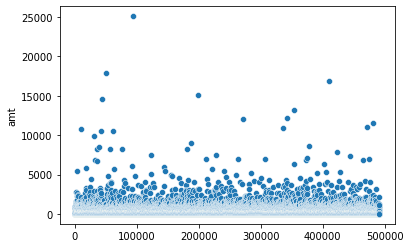

In [12]:
sns.scatterplot(x = cc_df.index, y = cc_df['amt'])

# 아직 이상한 값이 많아 보임...

In [13]:
# 최대 금액 관련 데이터 세부 내용 확인
cc_df[cc_df['amt'] == 25086.94]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
93045,2019-06-14 20:15:38,5540636818935089,fraud_Hackett Group,travel,25086.94,Kenneth,Foster,M,329 Michael Extension,Lawrence,MA,1843,42.6911,-71.1605,Geoscientist,1985-04-04,0b902a1e549c98b949444a7557da2403,1339704938,42.397174,-71.474163,0


In [14]:
# 저 고객의 카드 거래 내역 확인
cc_df[cc_df['cc_num'] == 5540636818935089 ]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
518,2019-01-01 21:09:06,5540636818935089,fraud_Bednar Inc,travel,5.03,Kenneth,Foster,M,329 Michael Extension,Lawrence,MA,1843,42.6911,-71.1605,Geoscientist,1985-04-04,7656ad34a3fdbf7d63e1fcbb666c9d46,1325452146,42.282085,-71.403129,0
653,2019-01-02 03:33:59,5540636818935089,fraud_Deckow-O'Conner,grocery_pos,81.63,Kenneth,Foster,M,329 Michael Extension,Lawrence,MA,1843,42.6911,-71.1605,Geoscientist,1985-04-04,c7cce533ec19f8774c50a94b1f981422,1325475239,42.045098,-71.936695,0
738,2019-01-02 13:28:02,5540636818935089,fraud_Hoppe-Parisian,kids_pets,91.41,Kenneth,Foster,M,329 Michael Extension,Lawrence,MA,1843,42.6911,-71.1605,Geoscientist,1985-04-04,105bffd3565dbb2f7affb67775941e6d,1325510882,42.954686,-71.071696,0
1150,2019-01-03 21:15:39,5540636818935089,fraud_Spencer PLC,entertainment,41.33,Kenneth,Foster,M,329 Michael Extension,Lawrence,MA,1843,42.6911,-71.1605,Geoscientist,1985-04-04,b6aceef0128c0565f1190491c7c329e1,1325625339,42.821890,-71.120264,0
1265,2019-01-04 08:15:29,5540636818935089,fraud_Kunze Inc,grocery_pos,33.94,Kenneth,Foster,M,329 Michael Extension,Lawrence,MA,1843,42.6911,-71.1605,Geoscientist,1985-04-04,48eb05e2402c011a48b10c93697b0cc6,1325664929,42.944982,-70.613790,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490251,2020-12-31 01:57:32,5540636818935089,"fraud_Swift, Bradtke and Marquardt",grocery_net,78.49,Kenneth,Foster,M,329 Michael Extension,Lawrence,MA,1843,42.6911,-71.1605,Geoscientist,1985-04-04,5700dba7608103d4b24a5e85e526805c,1388455052,42.891603,-70.440293,0
490585,2020-12-31 13:57:20,5540636818935089,fraud_Gislason Group,travel,141.30,Kenneth,Foster,M,329 Michael Extension,Lawrence,MA,1843,42.6911,-71.1605,Geoscientist,1985-04-04,0a7494dfcea628cca5134699a599a246,1388498240,42.245967,-71.126620,0
490880,2020-12-31 19:20:12,5540636818935089,fraud_Abbott-Steuber,personal_care,149.71,Kenneth,Foster,M,329 Michael Extension,Lawrence,MA,1843,42.6911,-71.1605,Geoscientist,1985-04-04,a4276ecc2f93e84cce8e76859ac4456e,1388517612,43.155023,-71.386231,0
490892,2020-12-31 19:36:54,5540636818935089,fraud_Terry-Huel,shopping_net,5.58,Kenneth,Foster,M,329 Michael Extension,Lawrence,MA,1843,42.6911,-71.1605,Geoscientist,1985-04-04,d0f8b426ad8fd3d72ce1a46819d3b030,1388518614,42.955068,-72.060647,0


In [15]:
# 이 고객의 카테고리별 카드 사용 내역 확인
cc_df[cc_df['cc_num'] == 5540636818935089 ].groupby('category').agg(transaction_count=('cc_num', 'size'), total_amt=('amt', 'sum'), average_amt=('amt', 'mean'))

,transaction_count,total_amt,average_amt
category,,,
entertainment,273,14851.03,54.399377
food_dining,267,11827.27,44.296891
gas_transport,393,26991.43,68.680483
grocery_net,200,10242.49,51.212450
grocery_pos,373,22494.35,60.306568
health_fitness,233,14628.89,62.784936
home,377,23169.58,61.457772
kids_pets,260,15288.20,58.800769
misc_net,159,13055.07,82.107358


In [16]:
# 여행에 돈을 많이 쓰는 사람처럼 보여서 25086만큼 쓸 수 있을 법도 하지만 혹시 모르니까 그 결제 내역 전후로 카드 사용 내역 추가 확인
# trans_date_trans_time을 datetime 형식으로 변환
cc_df['trans_date_trans_time'] = pd.to_datetime(cc_df['trans_date_trans_time'])

# 기준 시간과 전후 6시간 계산
base_time = pd.to_datetime('2019-06-14 20:15:38')
start_time = base_time - pd.Timedelta(hours=6)
end_time = base_time + pd.Timedelta(hours=6)

# cc_num이 5540636818935089인 고객의 데이터 중 기준 시간 전후 6시간 내의 거래 필터링
cc_df[(cc_df['cc_num'] == 5540636818935089) & (cc_df['trans_date_trans_time'] >= start_time) & (cc_df['trans_date_trans_time'] <= end_time)]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
92858,2019-06-14 15:05:42,5540636818935089,"fraud_Parker, Nolan and Trantow",entertainment,11.33,Kenneth,Foster,M,329 Michael Extension,Lawrence,MA,1843,42.6911,-71.1605,Geoscientist,1985-04-04,1731504dcbac4e40a9a936e881a76aa3,1339686342,42.812687,-70.790654,0
93045,2019-06-14 20:15:38,5540636818935089,fraud_Hackett Group,travel,25086.94,Kenneth,Foster,M,329 Michael Extension,Lawrence,MA,1843,42.6911,-71.1605,Geoscientist,1985-04-04,0b902a1e549c98b949444a7557da2403,1339704938,42.397174,-71.474163,0
93147,2019-06-14 23:09:13,5540636818935089,fraud_Donnelly LLC,entertainment,11.43,Kenneth,Foster,M,329 Michael Extension,Lawrence,MA,1843,42.6911,-71.1605,Geoscientist,1985-04-04,a6ae84df575620c783593f0bebe9b08c,1339715353,43.420883,-71.119054,0


In [17]:
# 아무래도 너무 특이한 케이스같아 보이므로 해당 데이터 삭제
cc_df = cc_df[cc_df['amt'] != 25086.94]

In [18]:
# 잘 삭제되었는지 확인
cc_df.describe()

,cc_num,amt,zip,lat,long,unix_time,merch_lat,merch_long,is_fraud
count,4.911330e+05,491133.000000,491133.000000,491133.000000,491133.000000,4.911330e+05,491133.000000,491133.000000,491133.000000
mean,3.706020e+17,68.999181,50770.632006,37.931220,-90.495658,1.358730e+09,37.930263,-90.495450,0.002533
std,1.260230e+18,156.298046,26854.884553,5.341194,12.990716,1.819402e+07,5.372988,13.004085,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.343087e+09,33.781377,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,1.357257e+09,38.545118,-87.573450,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,1.374626e+09,41.624231,-80.685606,0.000000
max,4.956829e+18,17897.240000,99323.000000,48.887800,-69.965600,1.388534e+09,49.887523,-68.965624,1.000000


In [48]:
# 결제 금액이 지나치게 높은 값들 수상해 보이므로 추가 확인
cc_df['amt'].sort_values(ascending=False).head(20)

49446     17897.24
410031    16837.08
198719    15047.03
43412     14630.68
352828    13149.15
341782    12176.55
271107    12025.30
480766    11586.34
472079    11052.59
336301    10881.08
9831      10776.59
61122     10525.07
42020     10469.09
30016      9931.82
187340     8981.87
378122     8645.35
38830      8524.52
56071      8266.86
180201     8255.19
75434      8221.84
Name: amt, dtype: float64

In [49]:
# 위 결과를 top20_amt로 저장 후 is_fraud 값과 함께 출력
top20_amt = cc_df['amt'].sort_values(ascending=False).head(20).index

In [50]:
cc_df.loc[top20_amt, ['amt', 'is_fraud']]
# 무조건 결제 금액이 크다고 사기는 아닌가봄...

,amt,is_fraud
49446,17897.24,0
410031,16837.08,0
198719,15047.03,0
43412,14630.68,0
352828,13149.15,0
341782,12176.55,0
271107,12025.30,0
480766,11586.34,0
472079,11052.59,0
336301,10881.08,0


# 새로운 피처 생성.1 (카드별 건당 평균 구매 금액)
- 카드 번호별 평균 구매 금액 계산해서 avg_amt로 컬럼 추가
- (평균 구매 금액보다 지나치게 큰 금액을 결제할 경우 fraud의심 가능하지 않을까..?)

In [19]:
# 카드 번호별 amt 평균 구하기
cc_df.groupby('cc_num')['amt'].transform('mean')

0         56.078113
1         59.858059
2         87.328067
3         64.317839
4         90.747123
            ...    
491129    87.442772
491130    58.181297
491131    50.452289
491132    88.704297
491133    61.737724
Name: amt, Length: 491133, dtype: float64

In [20]:
# 위 결과를 avg_amt 컬럼으로 추가
cc_df['avg_amt'] = cc_df.groupby('cc_num')['amt'].transform('mean')

In [21]:
# 추가 결과 확인
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,avg_amt
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,56.078113
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,59.858059
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,87.328067
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,64.317839
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,90.747123


# 새로운 피처 생성.2 (결제 시간 관련)
- 결제 시간대 (너무 새벽이나 보통 거래가 잘 일어나지 않는 시간대에 거래 발생시 fraud 의심)
- 결제 요일
- 주말 여부
- 최근 거래와의 시간 차이 (너무 짧은 시간 안에 여러번 결제하면 fraud 의심)

In [22]:
# trans_date_trans_time가 datetime으로 바뀌어 있는지 확인
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491133 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491133 non-null  datetime64[ns]
 1   cc_num                 491133 non-null  int64         
 2   merchant               491133 non-null  object        
 3   category               491133 non-null  object        
 4   amt                    491133 non-null  float64       
 5   first                  491133 non-null  object        
 6   last                   491133 non-null  object        
 7   gender                 491133 non-null  object        
 8   street                 491133 non-null  object        
 9   city                   491133 non-null  object        
 10  state                  491133 non-null  object        
 11  zip                    491133 non-null  int64         
 12  lat                    491133 non-null  floa

In [23]:
# 결제 시간만 뽑아서 trans_hour로 컬럼 추가
cc_df['trans_hour'] = cc_df['trans_date_trans_time'].dt.hour

In [24]:
# 확인
cc_df.tail()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,avg_amt,trans_hour
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,87.442772,23
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,58.181297,23
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,50.452289,23
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,88.704297,23
491133,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.6665,-97.4798,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0,61.737724,23


In [25]:
# 결제 요일도 뽑아서 trans_dow 컬럼 추가
cc_df['trans_dow'] = cc_df['trans_date_trans_time'].dt.dayofweek

In [26]:
# 주말 여부 weekend 컬럼 추가
cc_df['weekend'] = cc_df['trans_date_trans_time'].dt.dayofweek >= 5

In [27]:
# 직전 거래와의 시간차 구해서 trans_gap으로 컬럼 추가
# 먼저 카듣별 거래시간 기준으로 정렬
cc_df = cc_df.sort_values(['cc_num', 'trans_date_trans_time'])

In [28]:
# 이전 거래 시간 정의
cc_df['prev_trans_time'] = cc_df.groupby('cc_num')['trans_date_trans_time'].shift(1)

In [29]:
# 거래 시간차 계산 및 컬럼 추가
cc_df['trans_gap'] = (cc_df['trans_date_trans_time'] - cc_df['prev_trans_time']).dt.total_seconds() / 3600.0

In [30]:
# 심야 결제 여부 관련 컬럼 추가
cc_df['trans_night'] = cc_df['trans_date_trans_time'].dt.hour.isin(range(0, 6)) | cc_df['trans_date_trans_time'].dt.hour.isin(range(23, 24))

In [31]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,avg_amt,trans_hour,trans_dow,weekend,prev_trans_time,trans_gap,trans_night
55,2019-01-01 04:34:51,503874407318,"fraud_Lind, Huel and McClure",gas_transport,63.89,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,5ef7adf6786b41be780a08212b32495e,1325392491,28.740953,-99.391846,0,60.253406,4,1,False,NaT,NaN,True
238,2019-01-01 14:14:18,503874407318,"fraud_Runolfsdottir, Mueller and Hand",entertainment,40.75,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,7d4f71c78267f01b54c92804a7aa1c80,1325427258,29.165407,-98.012932,0,60.253406,14,1,False,2019-01-01 04:34:51,9.657500,False
502,2019-01-01 20:49:42,503874407318,fraud_Will Ltd,food_dining,105.78,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,dd25ad6eb8d19c91179b1aec1cd698f3,1325450982,30.468436,-98.663858,0,60.253406,20,1,False,2019-01-01 14:14:18,6.590000,False
529,2019-01-01 21:23:54,503874407318,fraud_Dickinson-Rempel,misc_pos,92.64,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,b3c21c15df76d9a71ed87fe75fe8d525,1325453034,29.361914,-98.911457,0,60.253406,21,1,False,2019-01-01 20:49:42,0.570000,False
709,2019-01-02 11:49:04,503874407318,fraud_Murray Ltd,grocery_net,28.43,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,9c6c99ce4bf96caea86b150f95ab08a5,1325504944,29.642642,-97.557834,0,60.253406,11,2,False,2019-01-01 21:23:54,14.419444,False


In [97]:
# 사기 거래(is_fraud = 1)인 경우와 그렇지 않은 경우의 평균 시간차 비교
cc_df.groupby('is_fraud')['trans_gap'].mean()

is_fraud
0    4.427092
1    4.826844
Name: trans_gap, dtype: float64

In [127]:
cc_df.groupby('trans_gap')['amt'].mean()

trans_gap
0.000000      48.521429
0.000278      34.529535
0.000556     113.091818
0.000833      82.845789
0.001111      44.792885
                ...    
77.586389     16.870000
83.514167     55.540000
87.665278     61.990000
90.568611      8.950000
93.666667      1.610000
Name: amt, Length: 70823, dtype: float64

# 구매금액 z-score

In [101]:
cc_df['cc_num'].value_counts()

30270432095985      4392
6538441737335434    4392
4364010865167176    4386
6538891242532018    4386
4642255475285942    4386
                    ... 
36913587729122      3641
30551643947183      3638
4005676619255478    3638
4681601008538160    3638
3511378610369890    3628
Name: cc_num, Length: 124, dtype: int64

In [102]:
# 카드번호별 평균과 표준편차 구해서 amt_info라는 데이터 생성
amt_info = cc_df.groupby('cc_num')['amt'].agg(['mean', 'std']).reset_index()

In [103]:
# 데이터 병합
cc_df = cc_df.merge(amt_info, on = 'cc_num', how = 'left')

In [105]:
# z스코어 계산 & 컬럼 추가
cc_df['amt_z'] = (cc_df['amt'] - cc_df['mean']) / cc_df['std']

In [106]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,avg_amt,trans_hour,trans_dow,weekend,prev_trans_time,trans_gap,trans_night,distance,fraud_amt_cluster,advanced_fraud_cluster,age,age_group,mean,std,amt_z
0,2019-01-01 04:34:51,503874407318,"fraud_Lind, Huel and McClure",gas_transport,63.89,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,5ef7adf6786b41be780a08212b32495e,1325392491,28.740953,-99.391846,0,60.253406,4,1,False,NaT,NaN,True,78.685085,NaN,NaN,48,45+,60.253406,127.265783,0.028575
1,2019-01-01 14:14:18,503874407318,"fraud_Runolfsdottir, Mueller and Hand",entertainment,40.75,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,7d4f71c78267f01b54c92804a7aa1c80,1325427258,29.165407,-98.012932,0,60.253406,14,1,False,2019-01-01 04:34:51,9.657500,False,42.294043,NaN,NaN,48,45+,60.253406,127.265783,-0.153249
2,2019-01-01 20:49:42,503874407318,fraud_Will Ltd,food_dining,105.78,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,dd25ad6eb8d19c91179b1aec1cd698f3,1325450982,30.468436,-98.663858,0,60.253406,20,1,False,2019-01-01 14:14:18,6.590000,False,61.158698,NaN,NaN,48,45+,60.253406,127.265783,0.357728
3,2019-01-01 21:23:54,503874407318,fraud_Dickinson-Rempel,misc_pos,92.64,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,b3c21c15df76d9a71ed87fe75fe8d525,1325453034,29.361914,-98.911457,0,60.253406,21,1,False,2019-01-01 20:49:42,0.570000,False,28.315597,NaN,NaN,48,45+,60.253406,127.265783,0.254480
4,2019-01-02 11:49:04,503874407318,fraud_Murray Ltd,grocery_net,28.43,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,9c6c99ce4bf96caea86b150f95ab08a5,1325504944,29.642642,-97.557834,0,60.253406,11,2,False,2019-01-01 21:23:54,14.419444,False,58.028119,NaN,NaN,48,45+,60.253406,127.265783,-0.250055


In [107]:
# 불필요한 컬럼 삭제
cc_df.drop(['mean', 'std'], axis = 1, inplace = True)

In [108]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,avg_amt,trans_hour,trans_dow,weekend,prev_trans_time,trans_gap,trans_night,distance,fraud_amt_cluster,advanced_fraud_cluster,age,age_group,amt_z
0,2019-01-01 04:34:51,503874407318,"fraud_Lind, Huel and McClure",gas_transport,63.89,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,5ef7adf6786b41be780a08212b32495e,1325392491,28.740953,-99.391846,0,60.253406,4,1,False,NaT,NaN,True,78.685085,NaN,NaN,48,45+,0.028575
1,2019-01-01 14:14:18,503874407318,"fraud_Runolfsdottir, Mueller and Hand",entertainment,40.75,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,7d4f71c78267f01b54c92804a7aa1c80,1325427258,29.165407,-98.012932,0,60.253406,14,1,False,2019-01-01 04:34:51,9.657500,False,42.294043,NaN,NaN,48,45+,-0.153249
2,2019-01-01 20:49:42,503874407318,fraud_Will Ltd,food_dining,105.78,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,dd25ad6eb8d19c91179b1aec1cd698f3,1325450982,30.468436,-98.663858,0,60.253406,20,1,False,2019-01-01 14:14:18,6.590000,False,61.158698,NaN,NaN,48,45+,0.357728
3,2019-01-01 21:23:54,503874407318,fraud_Dickinson-Rempel,misc_pos,92.64,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,b3c21c15df76d9a71ed87fe75fe8d525,1325453034,29.361914,-98.911457,0,60.253406,21,1,False,2019-01-01 20:49:42,0.570000,False,28.315597,NaN,NaN,48,45+,0.254480
4,2019-01-02 11:49:04,503874407318,fraud_Murray Ltd,grocery_net,28.43,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,9c6c99ce4bf96caea86b150f95ab08a5,1325504944,29.642642,-97.557834,0,60.253406,11,2,False,2019-01-01 21:23:54,14.419444,False,58.028119,NaN,NaN,48,45+,-0.250055


In [109]:
# 카드별 카테고리별 z-score도 계산해보기
cat_info = cc_df.groupby(['cc_num', 'category'])['amt'].agg(['mean', 'std']).reset_index()

In [110]:
cc_df = cc_df.merge(cat_info, on = ['cc_num', 'category'], how = 'left')

In [112]:
cc_df['cat_amt_z'] = (cc_df['amt'] - cc_df['mean']) / cc_df['std']

In [114]:
cc_df.drop(['mean', 'std'], axis = 1, inplace = True)

In [115]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,avg_amt,trans_hour,trans_dow,weekend,prev_trans_time,trans_gap,trans_night,distance,fraud_amt_cluster,advanced_fraud_cluster,age,age_group,amt_z,cat_amt_z
0,2019-01-01 04:34:51,503874407318,"fraud_Lind, Huel and McClure",gas_transport,63.89,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,5ef7adf6786b41be780a08212b32495e,1325392491,28.740953,-99.391846,0,60.253406,4,1,False,NaT,NaN,True,78.685085,NaN,NaN,48,45+,0.028575,-0.310094
1,2019-01-01 14:14:18,503874407318,"fraud_Runolfsdottir, Mueller and Hand",entertainment,40.75,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,7d4f71c78267f01b54c92804a7aa1c80,1325427258,29.165407,-98.012932,0,60.253406,14,1,False,2019-01-01 04:34:51,9.657500,False,42.294043,NaN,NaN,48,45+,-0.153249,-0.315694
2,2019-01-01 20:49:42,503874407318,fraud_Will Ltd,food_dining,105.78,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,dd25ad6eb8d19c91179b1aec1cd698f3,1325450982,30.468436,-98.663858,0,60.253406,20,1,False,2019-01-01 14:14:18,6.590000,False,61.158698,NaN,NaN,48,45+,0.357728,1.440815
3,2019-01-01 21:23:54,503874407318,fraud_Dickinson-Rempel,misc_pos,92.64,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,b3c21c15df76d9a71ed87fe75fe8d525,1325453034,29.361914,-98.911457,0,60.253406,21,1,False,2019-01-01 20:49:42,0.570000,False,28.315597,NaN,NaN,48,45+,0.254480,0.209785
4,2019-01-02 11:49:04,503874407318,fraud_Murray Ltd,grocery_net,28.43,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,9c6c99ce4bf96caea86b150f95ab08a5,1325504944,29.642642,-97.557834,0,60.253406,11,2,False,2019-01-01 21:23:54,14.419444,False,58.028119,NaN,NaN,48,45+,-0.250055,-1.094205


# 위도, 경도 활용??
- 카드 소유주의 위치와 결제 매장 위치 사이의 거리 계산
- 너무 멀리 떨어져 있으면 fraud 의심

In [32]:
!pip install geopy
from geopy.distance import distance

cc_df['distance'] = cc_df.apply(lambda row: distance((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).miles, axis=1)

In [116]:
# 거리의 z-score도 구해봐?
dist_info = cc_df.groupby('cc_num')['distance'].agg(['mean', 'std']).reset_index()

In [117]:
cc_df = cc_df.merge(dist_info, on = 'cc_num', how = 'left')

In [119]:
cc_df['dist_z'] = (cc_df['distance'] - cc_df['mean']) / cc_df['std']

In [121]:
cc_df.drop(['mean', 'std'], axis = 1, inplace = True)

In [122]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,avg_amt,trans_hour,trans_dow,weekend,prev_trans_time,trans_gap,trans_night,distance,fraud_amt_cluster,advanced_fraud_cluster,age,age_group,amt_z,cat_amt_z,dist_z
0,2019-01-01 04:34:51,503874407318,"fraud_Lind, Huel and McClure",gas_transport,63.89,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,5ef7adf6786b41be780a08212b32495e,1325392491,28.740953,-99.391846,0,60.253406,4,1,False,NaT,NaN,True,78.685085,NaN,NaN,48,45+,0.028575,-0.310094,1.576429
1,2019-01-01 14:14:18,503874407318,"fraud_Runolfsdottir, Mueller and Hand",entertainment,40.75,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,7d4f71c78267f01b54c92804a7aa1c80,1325427258,29.165407,-98.012932,0,60.253406,14,1,False,2019-01-01 04:34:51,9.657500,False,42.294043,NaN,NaN,48,45+,-0.153249,-0.315694,-0.392759
2,2019-01-01 20:49:42,503874407318,fraud_Will Ltd,food_dining,105.78,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,dd25ad6eb8d19c91179b1aec1cd698f3,1325450982,30.468436,-98.663858,0,60.253406,20,1,False,2019-01-01 14:14:18,6.590000,False,61.158698,NaN,NaN,48,45+,0.357728,1.440815,0.628043
3,2019-01-01 21:23:54,503874407318,fraud_Dickinson-Rempel,misc_pos,92.64,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,b3c21c15df76d9a71ed87fe75fe8d525,1325453034,29.361914,-98.911457,0,60.253406,21,1,False,2019-01-01 20:49:42,0.570000,False,28.315597,NaN,NaN,48,45+,0.254480,0.209785,-1.149159
4,2019-01-02 11:49:04,503874407318,fraud_Murray Ltd,grocery_net,28.43,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,9c6c99ce4bf96caea86b150f95ab08a5,1325504944,29.642642,-97.557834,0,60.253406,11,2,False,2019-01-01 21:23:54,14.419444,False,58.028119,NaN,NaN,48,45+,-0.250055,-1.094205,0.458641


# is_fraud 활용해보기

- 컬럼별 상관관계 확인
- 사기가 주로 발생하는 카테고리, 시간대, 요일, 위치 등 확인


In [33]:
cc_df.corr()

,cc_num,amt,zip,lat,long,unix_time,merch_lat,merch_long,is_fraud,avg_amt,trans_hour,trans_dow,weekend,trans_gap,trans_night,distance
cc_num,1.000000,-0.001437,-0.028798,-0.056955,0.063097,-0.001497,-0.056439,0.062832,0.000386,-0.014924,-0.004034,-0.001498,-0.004579,0.005780,0.004770,0.001392
amt,-0.001437,1.000000,0.011460,-0.011461,-0.007094,-0.002826,-0.011244,-0.007057,0.131852,0.096276,-0.054721,0.001013,0.001326,0.003464,0.037929,-0.000951
zip,-0.028798,0.011460,1.000000,-0.125384,-0.920683,0.002149,-0.124935,-0.919777,-0.003005,0.119037,0.000119,-0.001873,-0.002807,-0.003627,-0.003640,0.007977
lat,-0.056955,-0.011461,-0.125384,1.000000,-0.011720,0.002311,0.994201,-0.011690,0.000827,-0.119049,0.004240,0.000436,0.000618,-0.011437,-0.001838,-0.074484
long,0.063097,-0.007094,-0.920683,-0.011720,1.000000,-0.000726,-0.011405,0.999013,0.002772,-0.073685,0.001128,0.002418,0.004331,0.004918,0.002940,0.002036
unix_time,-0.001497,-0.002826,0.002149,0.002311,-0.000726,1.000000,0.002019,-0.000720,-0.008156,0.002566,0.003086,-0.080412,-0.072735,-0.076641,-0.002076,-0.000521
merch_lat,-0.056439,-0.011244,-0.124935,0.994201,-0.011405,0.002019,1.000000,-0.011380,0.000916,-0.118416,0.004202,0.000324,0.000511,-0.011240,-0.001989,-0.074656
merch_long,0.062832,-0.007057,-0.919777,-0.011690,0.999013,-0.000720,-0.011380,1.000000,0.002715,-0.073650,0.001085,0.002352,0.004259,0.005029,0.002994,0.002099
is_fraud,0.000386,0.131852,-0.003005,0.000827,0.002772,-0.008156,0.000916,0.002715,1.000000,-0.010388,-0.020113,-0.001562,-0.002299,0.003698,0.057638,0.000660
avg_amt,-0.014924,0.096276,0.119037,-0.119049,-0.073685,0.002566,-0.118416,-0.073650,-0.010388,1.000000,-0.021203,-0.006637,-0.003365,-0.013329,0.012133,0.007396


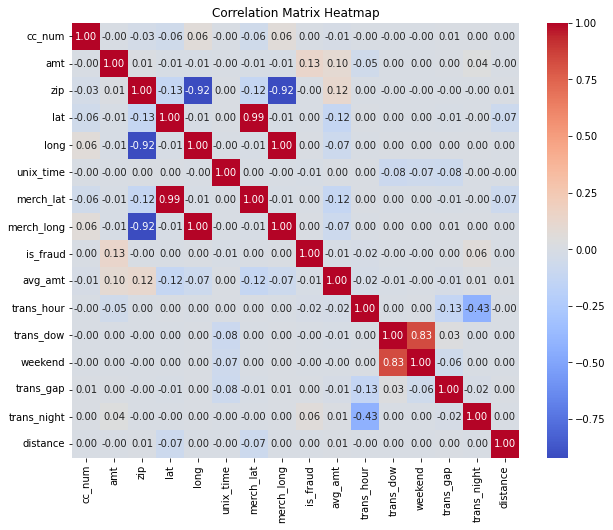

In [54]:
corr_matrix = cc_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [52]:
# 숫자형 데이터 컬럼만 선택
numeric_cols = cc_df.select_dtypes(include=['number']).columns

# is_fraud와의 상관관계 계산
correlation_matrix = cc_df[numeric_cols].corr()

# is_fraud와 가장 상관관계가 높은 컬럼 찾기
is_fraud_corr = correlation_matrix['is_fraud'].drop('is_fraud')  # is_fraud와 자기 자신과의 상관관계는 제외
most_correlated_col = is_fraud_corr.idxmax()
highest_correlation = is_fraud_corr.max()

print("카드 사기와 가장 상관관계가 높은 컬럼:", most_correlated_col)
print("상관계수:", highest_correlation)

카드 사기와 가장 상관관계가 높은 컬럼: amt
상관계수: 0.13185243858119342


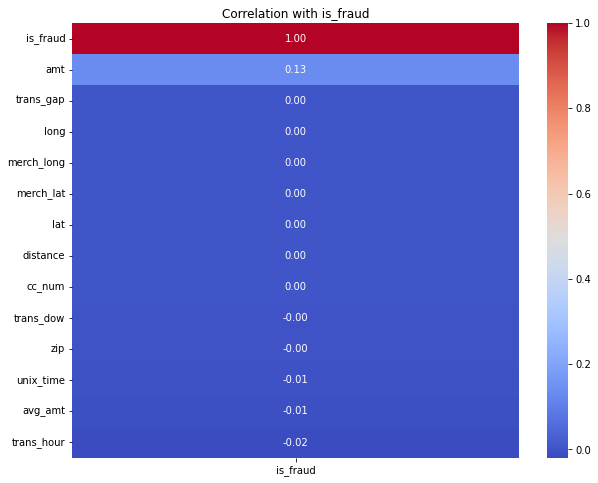

In [55]:
# is_fraud와의 상관관계만 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['is_fraud']].sort_values(by='is_fraud', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with is_fraud')
plt.show()

In [35]:
corr_matrix['is_fraud'].sort_values(ascending=False)

is_fraud       1.000000
amt            0.131852
trans_night    0.057638
trans_gap      0.003698
long           0.002772
merch_long     0.002715
merch_lat      0.000916
lat            0.000827
distance       0.000660
cc_num         0.000386
trans_dow     -0.001562
weekend       -0.002299
zip           -0.003005
unix_time     -0.008156
avg_amt       -0.010388
trans_hour    -0.020113
Name: is_fraud, dtype: float64

In [56]:
# is_fraud가 True인 데이터들의 amt 기술 통계
fraud_amt_stats = cc_df[cc_df['is_fraud'] == 1]['amt'].describe()
print(fraud_amt_stats)

count    1244.000000
mean      477.958328
std       398.229485
min         6.380000
25%        22.895000
50%       334.750000
75%       865.385000
max      1371.810000
Name: amt, dtype: float64


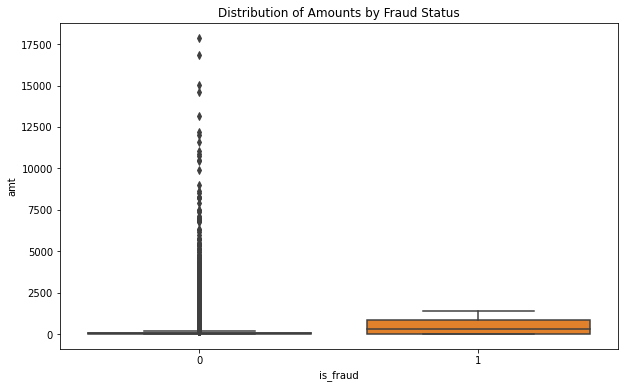

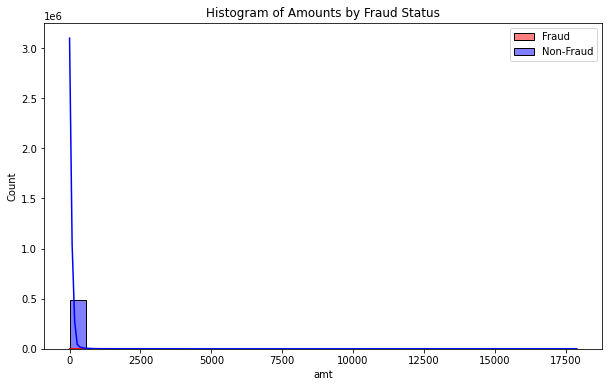

In [57]:
# 박스 플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=cc_df)
plt.title('Distribution of Amounts by Fraud Status')
plt.show()

# 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(cc_df[cc_df['is_fraud'] == 1]['amt'], bins=30, kde=True, color='red', label='Fraud')
sns.histplot(cc_df[cc_df['is_fraud'] == 0]['amt'], bins=30, kde=True, color='blue', label='Non-Fraud')
plt.title('Histogram of Amounts by Fraud Status')
plt.legend()
plt.show()

# 기타


In [72]:
# 성별에 따른 사기 비율
cc_df.groupby('gender')['is_fraud'].mean()

gender
F    0.002406
M    0.002855
Name: is_fraud, dtype: float64

# 나이


In [74]:
# 나이에 따른 사기 비율
# 현재 날짜 기준 나이 계산
cc_df['dob'] = pd.to_datetime(cc_df['dob'])
current_date = pd.to_datetime('today')
cc_df['age'] = (current_date - cc_df['dob']).astype('<m8[Y]').astype(int)

In [76]:
cc_df['age'].max()

53

In [79]:
# 연령대별 그룹화
bins = [0, 18, 25, 35, 45, 55]
labels = ['0-17', '18-24', '25-34', '35-44', '45+']
cc_df['age_group'] = pd.cut(cc_df['age'], bins=bins, labels=labels, right=False)

In [80]:
# 연령대별 사기 비율 계산
age_group_fraud_ratio = cc_df.groupby('age_group')['is_fraud'].mean()

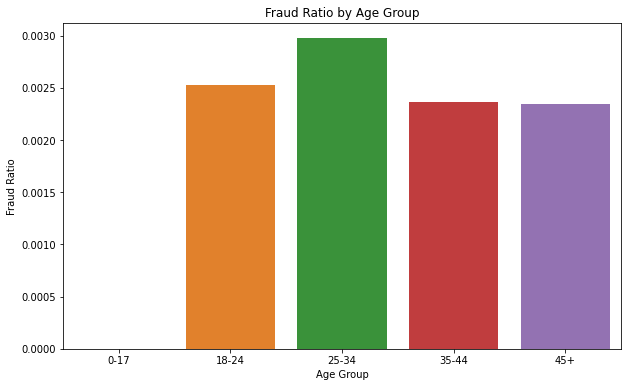

In [81]:
# 결과 출력 및 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_fraud_ratio.index, y=age_group_fraud_ratio.values)
plt.xlabel('Age Group')
plt.ylabel('Fraud Ratio')
plt.title('Fraud Ratio by Age Group')
plt.show()

In [99]:
# job이 중구난방으로 입력되어 있어 정리 필요
cc_df['job'].unique()

array(['Exhibition designer', 'Copywriter, advertising',
       'Exhibitions officer, museum/gallery', 'Retail merchandiser',
       'Special educational needs teacher', 'Forensic psychologist',
       'Immunologist', 'Chief Executive Officer', 'Tourism officer',
       'Television production assistant', 'Therapist, art',
       'Journalist, newspaper', 'Psychologist, forensic', 'Site engineer',
       'Firefighter', 'Paramedic', 'Designer, industrial/product', 'Sub',
       'Child psychotherapist', 'Press sub', 'Environmental consultant',
       'Careers information officer', 'Toxicologist',
       'Petroleum engineer', 'Intelligence analyst', 'Building surveyor',
       'Surveyor, land/geomatics', 'Risk analyst',
       'Leisure centre manager', 'Designer, exhibition/display',
       'Research scientist (physical sciences)', 'Fine artist',
       'Advertising account planner', 'Music therapist',
       'Doctor, hospital', 'Comptroller', 'Regulatory affairs officer',
       'Statistic

In [37]:
# 카테고리별 사기건수
cc_df.groupby('category')['is_fraud'].sum()

category
entertainment      53
food_dining        62
gas_transport     101
grocery_net         8
grocery_pos       216
health_fitness     40
home               72
kids_pets          68
misc_net          109
misc_pos           57
personal_care      58
shopping_net      242
shopping_pos      134
travel             24
Name: is_fraud, dtype: int64

In [38]:
# 시간대별 사기건수
cc_df.groupby('trans_hour')['is_fraud'].sum()

trans_hour
0     132
1     125
2     142
3     150
4      14
5      17
6       8
7      20
8      14
9      11
10     11
11      7
12      7
13     16
14      4
15      7
16     10
17      4
18      9
19     12
20     13
21     11
22    260
23    240
Name: is_fraud, dtype: int64

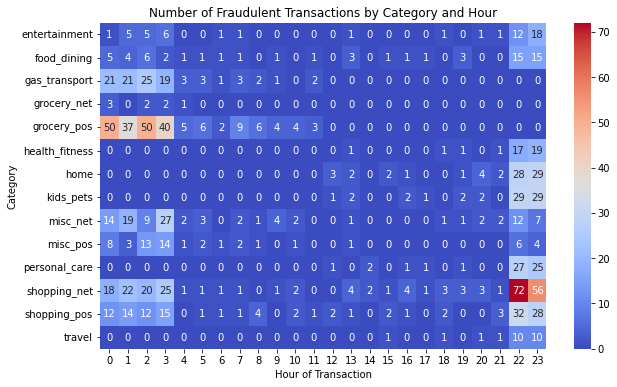

In [39]:
# 카테고리x시간대별 사기건수 시각화
fraud_counts = cc_df[cc_df['is_fraud'] == 1].groupby(['category', 'trans_hour']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(fraud_counts, annot=True, cmap='coolwarm', fmt='d')
plt.title('Number of Fraudulent Transactions by Category and Hour')
plt.xlabel('Hour of Transaction')
plt.ylabel('Category')
plt.show()

In [40]:
# 평균 결제 시간 차이
cc_df['trans_gap'].mean()

4.428105125251155

In [41]:
cc_df[cc_df['trans_gap'] < 1]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,avg_amt,trans_hour,trans_dow,weekend,prev_trans_time,trans_gap,trans_night,distance
529,2019-01-01 21:23:54,503874407318,fraud_Dickinson-Rempel,misc_pos,92.64,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,b3c21c15df76d9a71ed87fe75fe8d525,1325453034,29.361914,-98.911457,0,60.253406,21,1,False,2019-01-01 20:49:42,0.570000,False,28.315597
976,2019-01-03 10:15:45,503874407318,"fraud_Swift, Bradtke and Marquardt",grocery_net,56.55,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,5e698e65b44802f10d509a3493c7b841,1325585745,30.188386,-98.993716,0,60.253406,10,3,False,2019-01-03 09:18:53,0.947778,False,50.102519
1137,2019-01-03 20:35:57,503874407318,fraud_Mohr-Bayer,shopping_net,6.92,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,9601e0a4007278586b8da64464a55b53,1325622957,28.776355,-98.940275,0,60.253406,20,3,False,2019-01-03 19:46:22,0.826389,False,61.485269
1148,2019-01-03 21:00:54,503874407318,"fraud_Kutch, Steuber and Gerhold",food_dining,50.72,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,c3b2b708957f62d85166f836004fb29d,1325624454,29.999898,-97.863406,0,60.253406,21,3,False,2019-01-03 20:35:57,0.415833,False,48.537559
1431,2019-01-04 17:35:21,503874407318,fraud_Balistreri-Nader,misc_pos,11.68,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,San Antonio,TX,78248,29.5894,-98.5201,Exhibition designer,1975-12-28,306d9df19f9bf75fda9c772224776197,1325698521,29.005523,-97.605896,0,60.253406,17,4,False,2019-01-04 17:32:43,0.043889,False,68.287678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489142,2020-12-29 20:49:23,4956828990005111019,"fraud_Stanton, Jakubowski and Baumbach",shopping_net,4.79,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,Operational researcher,1980-12-21,fd715d6853a6c12a584f43c13fb75f19,1388350163,40.207431,-73.290537,0,59.858059,20,1,False,2020-12-29 19:54:37,0.912778,False,58.826749
489509,2020-12-30 02:32:49,4956828990005111019,fraud_Paucek-Wiza,grocery_net,60.05,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,Operational researcher,1980-12-21,a1502e640ea4a07b873ab38bad6003c1,1388370769,39.978318,-73.280544,0,59.858059,2,2,False,2020-12-30 01:52:14,0.676389,True,69.211538
490179,2020-12-30 23:24:41,4956828990005111019,fraud_Lubowitz-Walter,kids_pets,123.15,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,Operational researcher,1980-12-21,c951feec855f6917ecf927591f9f885d,1388445881,41.002755,-73.668455,0,59.858059,23,2,False,2020-12-30 22:48:18,0.606389,True,36.874805
490237,2020-12-31 01:18:33,4956828990005111019,fraud_Vandervort-Funk,grocery_pos,93.85,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,Operational researcher,1980-12-21,44a03cb67473cc5d2f9ad56d073a57a3,1388452713,40.885707,-74.064619,0,59.858059,1,3,False,2020-12-31 00:35:08,0.723611,True,16.786833


# 회고
- 뭔가를 많이 배우긴 했는데 언제/무엇을/어떻게 적용해야 하는지 아직 감이 잘 안온다.
- 특히 이렇게 문자형 데이터가 많을 때에는 원핫인코딩과 스케일링을 어떻게 적용시켜야 하는 것인지 잘 모르겠다.
- 카드 사기를 걸러내기 위한 다양한 아이디어는 떠오르는데 그걸 실현할 수 있는 코드나 방법을 모르니까 답답하다.
- 할 줄 아는게 많아질수록 더 재밌어질 것 같다...!